## Deep Learning Mammograms 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import math
import cv2
import tensorflow as tf

In [2]:
directory_path = 'D:\Dataset\MINI-DDSM-Complete-JPEG-8'
number_of_images = 0
for entry in os.scandir(directory_path):
    if entry.is_file():
        if entry.name.endswith(('.jpg', 'png', 'jpeg', 'pgm', 'dcm')):
            number_of_images += 1

print(f"Number of images in directory {directory_path} : {number_of_images}")

Number of images in directory D:\Dataset\MINI-DDSM-Complete-JPEG-8 : 1


## Mini CBIS MINI-DDSM-Complete Dataset 

Link to [dataset](https://www.kaggle.com/datasets/cheddad/miniddsm2?select=MINI-DDSM-Complete-JPEG-8)

### Data Processing

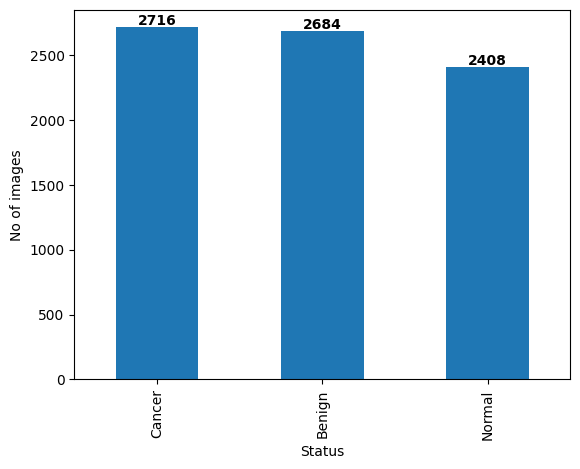

In [3]:
# check data_info on csv file
db = pd.read_excel('D:\Dataset\MINI-DDSM-Complete-JPEG-8\DataWMask.xlsx')

# plot bar chart of status 
ax = db['Status'].value_counts().plot(kind='bar', ylabel='No of images' )

for i,v in enumerate(db['Status'].value_counts()):
    ax.text(i, v, str(v), color='black', fontweight='bold', va='bottom', ha='center')


In [4]:
# Data PreProcessing
# benign dataset 
db_benign_images = 'D:\Dataset\MINI-DDSM-Complete-JPEG-8\Benign'

db_benign_images_file_path = []

for root, dirs, files in os.walk(db_benign_images):
    for file in files:
        if (file.endswith('.jpg') or file.endswith('.JPG')) and not (file.endswith('_Mask.jpg') or file.endswith('_MASK2.jpg')):
            db_benign_images_file_path.append(os.path.join(root, file))



In [5]:
# Data PreProcessing
# benign dataset 
db_cancer_images = 'D:\Dataset\MINI-DDSM-Complete-JPEG-8\Cancer'

db_cancer_images_file_path = []

for root, dirs, files in os.walk(db_cancer_images):
    for file in files:
        if (file.endswith('.jpg') or file.endswith('.JPG')) and not (file.endswith('_Mask.jpg') or file.endswith('_MASK2.jpg')):
            db_cancer_images_file_path.append(os.path.join(root, file))



In [6]:
# Data PreProcessing
# benign dataset 
db_normal_images = r'D:\Dataset\MINI-DDSM-Complete-JPEG-8\Normal'

db_normal_images_file_path = []

for root, dirs, files in os.walk(db_normal_images):
    for file in files:
        if (file.endswith('.jpg') or file.endswith('.JPG')) and not (file.endswith('_Mask.jpg') or file.endswith('_MASK2.jpg')):
            db_normal_images_file_path.append(os.path.join(root, file))



In [7]:
# print first 5 images in db_normal_images_file_path
for i in range(5):
    print(db_normal_images_file_path[i])

D:\Dataset\MINI-DDSM-Complete-JPEG-8\Normal\0002\A_0002_1.LEFT_CC.jpg
D:\Dataset\MINI-DDSM-Complete-JPEG-8\Normal\0002\A_0002_1.LEFT_MLO.jpg
D:\Dataset\MINI-DDSM-Complete-JPEG-8\Normal\0002\A_0002_1.RIGHT_CC.jpg
D:\Dataset\MINI-DDSM-Complete-JPEG-8\Normal\0002\A_0002_1.RIGHT_MLO.jpg
D:\Dataset\MINI-DDSM-Complete-JPEG-8\Normal\0003\A_0003_1.LEFT_CC.jpg


In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7808 entries, 0 to 7807
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fullPath         7808 non-null   object 
 1   fileName         7808 non-null   object 
 2   View             7808 non-null   object 
 3   Side             7808 non-null   object 
 4   Status           7808 non-null   object 
 5   Tumour_Contour   7808 non-null   object 
 6   Tumour_Contour2  7808 non-null   object 
 7   Age              7796 non-null   float64
 8   Density          7808 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 549.1+ KB


In [9]:
# check number of benign, cancer and normal images in dataset
status_counts = db['Status'].value_counts()
print(status_counts)

Status
Cancer    2716
Benign    2684
Normal    2408
Name: count, dtype: int64


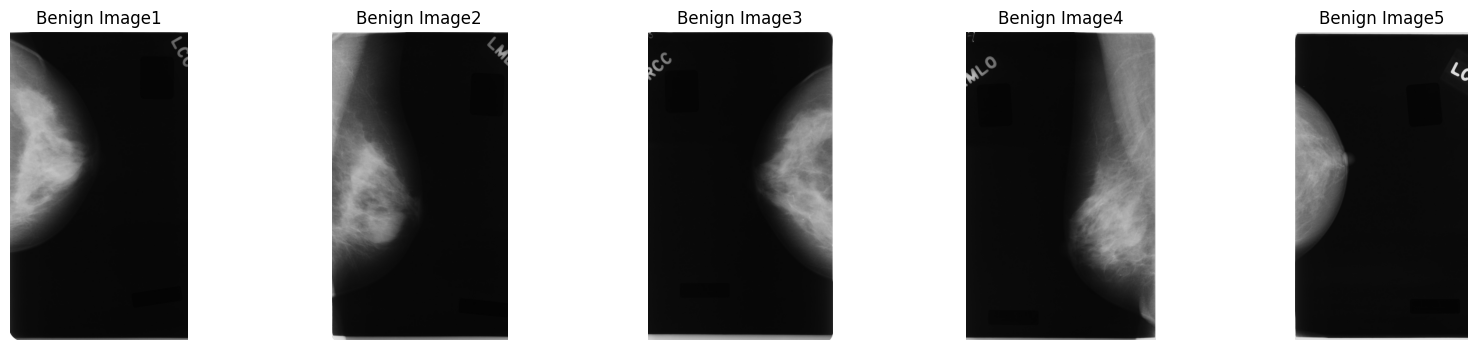

In [10]:
# display first five images in benign dataset 
fig, axes = plt.subplots(1, 5, figsize = (20,4))

for i, db_benign_image_file_path in enumerate(db_benign_images_file_path[:5]):
    image = cv2.imread(db_benign_images_file_path[i])
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    axes[i].imshow(image_rgb)
    axes[i].set_title(f'Benign Image{i+1}')
    axes[i].axis('off')

plt.show()

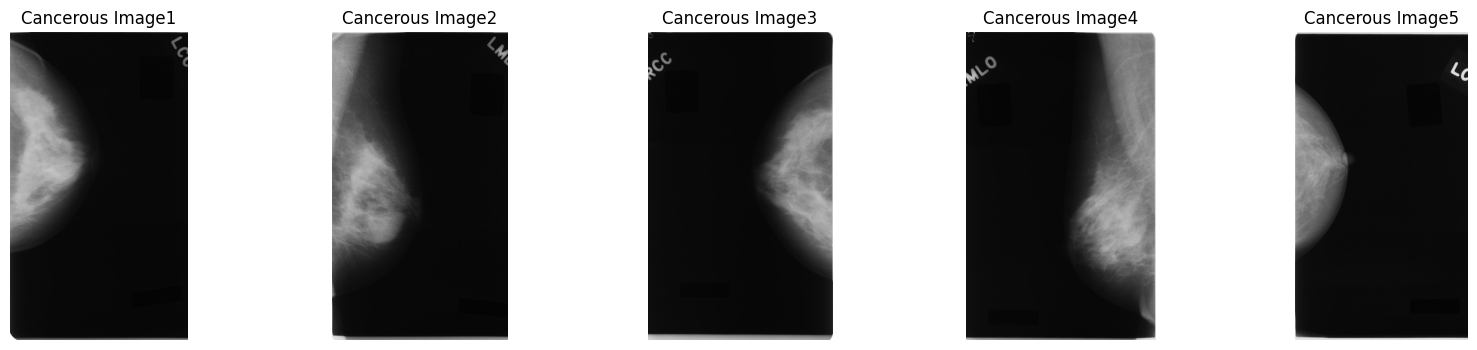

In [11]:
# display first five images in cancer dataset 
fig, axes = plt.subplots(1, 5, figsize = (20,4))

for i, db_cancer_image_file_path in enumerate(db_cancer_images_file_path[:5]):
    image = cv2.imread(db_benign_images_file_path[i])
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    axes[i].imshow(image_rgb)
    axes[i].set_title(f'Cancerous Image{i+1}')
    axes[i].axis('off')

plt.show()

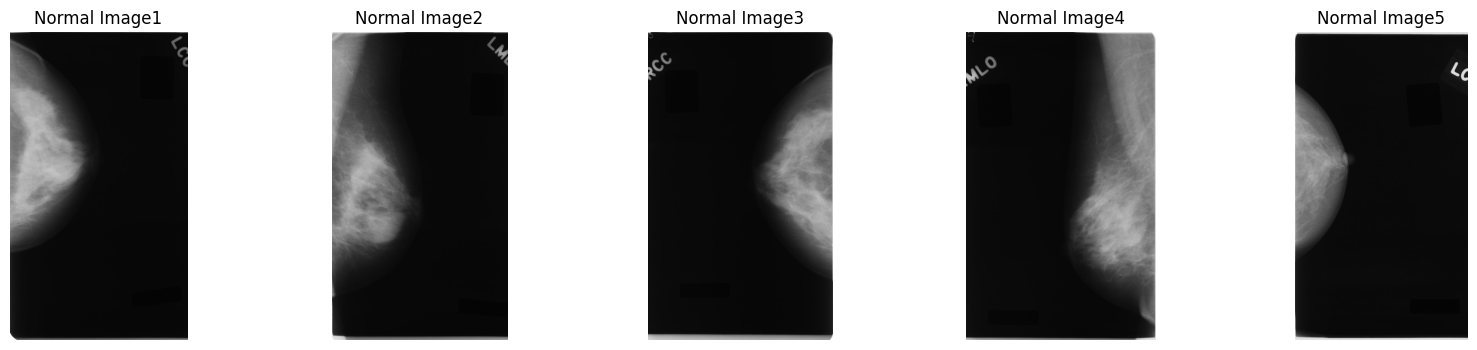

In [12]:
# display first five images in normal dataset 
fig, axes = plt.subplots(1, 5, figsize = (20,4))

for i, db_normal_image_file_path in enumerate(db_normal_images_file_path[:5]):
    image = cv2.imread(db_benign_images_file_path[i])
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    axes[i].imshow(image_rgb)
    axes[i].set_title(f'Normal Image{i+1}')
    axes[i].axis('off')

plt.show()

In [13]:
# function to resize images

def resize_images(image_path, new_height, new_width):
    resized_images = []
    for path in image_path:
        image = cv2.imread(path)
        resized_image = cv2.resize(image, (new_height, new_width))
        resized_images.append(resized_image)

    return resized_images



In [14]:
# resize benign images 
new_height = 200
new_width = 200
resized_benign_images = resize_images(db_benign_images_file_path, new_height, new_width)

In [15]:
# resize cancer images 
new_height = 200
new_width = 200
resized_cancer_images = resize_images(db_cancer_images_file_path, new_height, new_width)

In [16]:
# resize normal images 
new_height = 200
new_width = 200
resized_normal_images = resize_images(db_normal_images_file_path, new_height, new_width)

In [17]:
# Display images

def display_images(images, title):
    plt.figure(figsize=(10, 3))
    num_of_displayed_images = min(len(images), 5)

    for i in range(num_of_displayed_images):
        plt.subplot(1, num_of_displayed_images, i+1)
        plt.imshow(images[i])
        plt.title(f'Image{i+1}')
        plt.axis('off')

    plt.suptitle(title, fontsize=20)
    plt.show()

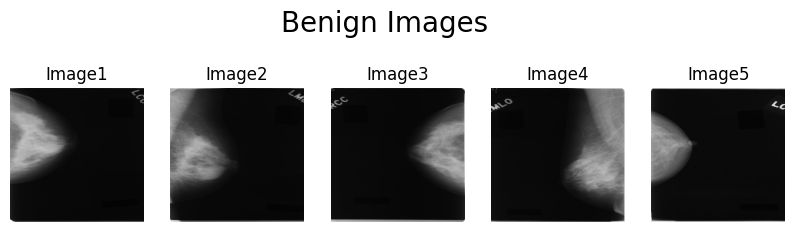

In [18]:
display_images(resized_benign_images, 'Benign Images')

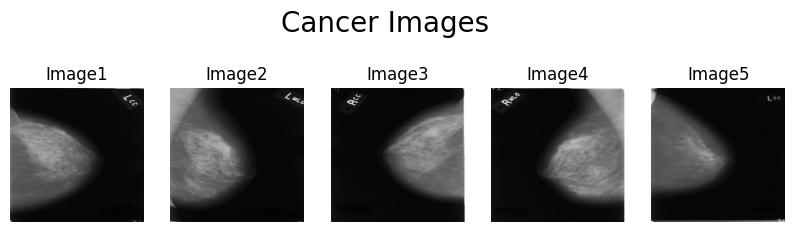

In [19]:
display_images(resized_cancer_images, 'Cancer Images')

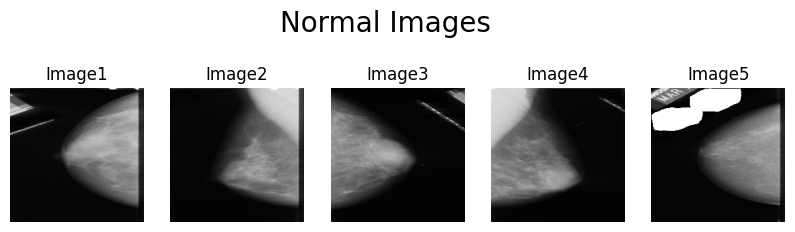

In [20]:
display_images(resized_normal_images, 'Normal Images')

In [21]:
db.isna().sum()

fullPath            0
fileName            0
View                0
Side                0
Status              0
Tumour_Contour      0
Tumour_Contour2     0
Age                12
Density             0
dtype: int64

In [22]:
# normalize pixel values to [0,1 ] range 
def normalize_images(images):
    normalized_images = []
    for image in images:
        normalized_image = image.astype(np.float32) / 255.0
        normalized_images.append(normalized_image)
    return normalized_images

In [23]:

normalized_benign_images = normalize_images(resized_benign_images)



In [24]:
normalized_cancer_images = normalize_images(resized_cancer_images)

In [25]:
normalized_normal_images = normalize_images(resized_normal_images)

In [26]:
def display_images(images, title):
    plt.figure(figsize=(10, 3))
    num_of_displayed_images = min(len(images), 5)

    for i in range(num_of_displayed_images):
        plt.subplot(1, num_of_displayed_images, i+1)
        plt.imshow(images[i])
        plt.title(f'Image{i+1}')
        plt.axis('off')

    plt.suptitle(title, fontsize=20)
    plt.show()

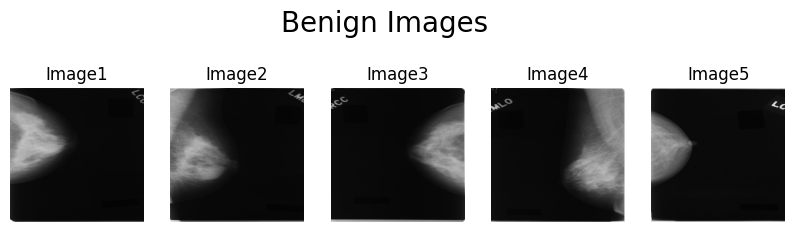

In [27]:
display_images(normalized_benign_images, 'Benign Images')

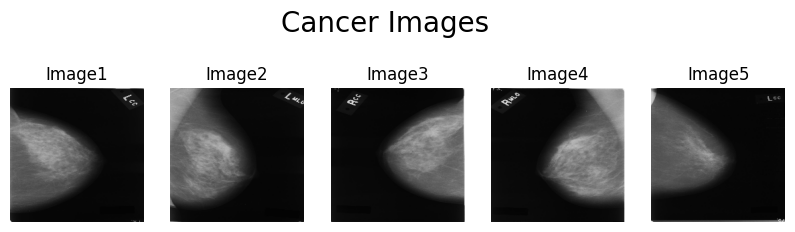

In [28]:
display_images(normalized_cancer_images, 'Cancer Images')

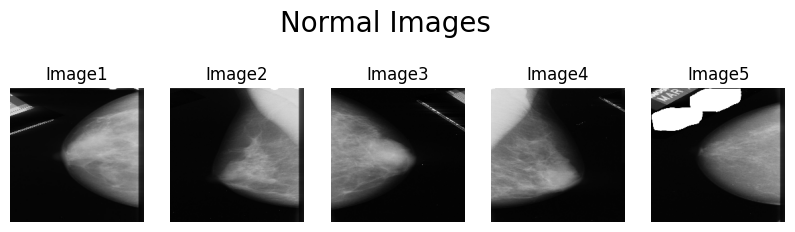

In [29]:
display_images(normalized_normal_images, 'Normal Images')

### Data Modeling and CNN

In [30]:
fixed_size = (50,50)

img_data = []
img_labels = []

# function to add labels and data


def combine_datasets(normalized_benign_images, normalized_cancer_images, normalized_normal_images):
    combined_data = []
    combined_labels = []
    
    # Add Mini CBIS DDSM data (benign, malignant, and normal images)
    for img in normalized_benign_images:
        combined_data.append(img)
        combined_labels.append(1)  # 1 for cancer
    
    for img in normalized_cancer_images:
        combined_data.append(img)
        combined_labels.append(2)  # 2 for malignant
    
    for img in normalized_normal_images:
        combined_data.append(img)
        combined_labels.append(0)  # 0 for non cancer
    
    return combined_data, combined_labels



In [31]:
import random

combined_data, combined_labels = combine_datasets(normalized_benign_images, normalized_cancer_images, normalized_cancer_images)

# shuffle dataset 
combined_dataset = list(zip(combined_data, combined_labels))
random.shuffle(combined_dataset)
combined_data, combined_labels = zip(*combined_dataset)

In [32]:
# visualize shuffled data
print(f'combined_data is of type: {type(combined_data)}')
print(f'combined_labels is of type: {type(combined_labels)}')

combined_data is of type: <class 'tuple'>
combined_labels is of type: <class 'tuple'>


In [33]:
# visualize shuffled data
def display_random_shuffled_images(combined_data, combined_labels, num_images=5):
    if len(combined_data) < num_images:
        raise ValueError(f"Not enough images: Expected {num_images}")
    
    indices = random.sample(range(len(combined_data)), num_images)

    fig, axes = plt.subplots(1, num_images, figsize = (15, 3))

    label_map = {0: "Normal", 1: "Cancer", 2: "Malignant"}

    for i, idx in enumerate(indices):
        img = combined_data[idx]
        label = combined_labels[idx]

        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'{label_map[label]}')

    plt.tight_layout()
    plt.show()



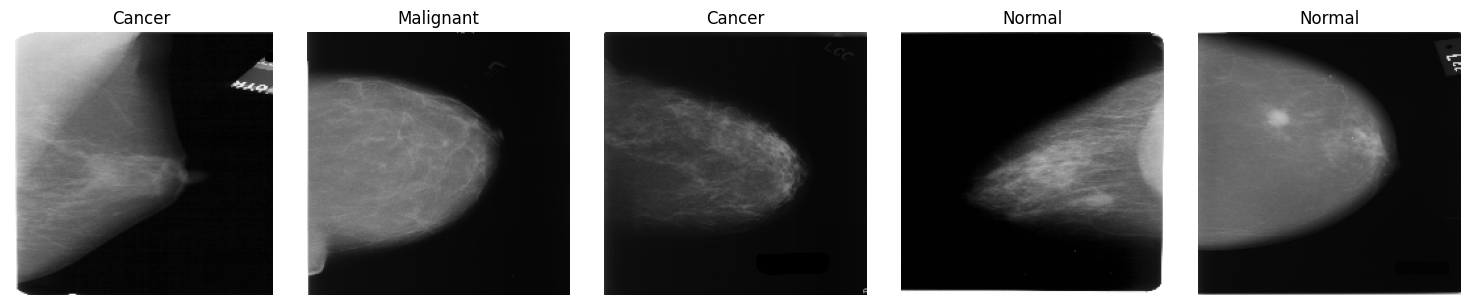

In [34]:
display_random_shuffled_images(combined_data, combined_labels)

In [35]:
fixed_size = (50, 50)

X = [] # list for image data
y = [] # list for labels

for img, label in zip(combined_data, combined_labels):
    img = cv2.resize(img, fixed_size, interpolation = cv2.INTER_LINEAR)
    X.append(img)
    y.append(label)

# convert data from tuples to lists
X = np.array(X)
y = np.array(y)

print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (8408, 50, 50, 3)
Shape of y: (8408,)


#### Train, Test and Validation Splitting

In [36]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


train_size = 0.7
test_size = 0.15
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.15, random_state=42)

num_classes = 3  # i.e. 0: "Normal", 1: "Cancer", 2: "Malignant"
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (5885, 50, 50, 3)
X_test shape: (1262, 50, 50, 3)
y_train shape: (5885, 3)
y_test shape: (1262, 3)


In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(rotation_range = 20, 
                         width_shift_range = 0.2, 
                         height_shift_range = 0.2, 
                         shear_range = 0.2, 
                         zoom_range = 0.2, 
                         horizontal_flip=True,
                         fill_mode='nearest')

# data generators

train_gen = gen.flow(X_train, y_train, batch_size=32)

test_gen = gen.flow(X_test, y_test, batch_size=32, shuffle=False)


#### Early Stopping Callback

In [38]:
# Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    min_delta = 1e-7,
    restore_best_weights=True
)

#### Learning Rate Scheduler

In [39]:
plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_delta=1e-7,
    cooldown=0,
    verbose=1
)

#### CNN

In [45]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# random seed
tf.random.set_seed(42)

# define input layer
input_layer = tf.keras.layers.Input(shape=(50,50,3), name='input_layer')

# CNN Layer
x = tf.keras.layers.Conv2D(32,(3,3), padding='same', activation='relu', name='conv1')(input_layer )
x = tf.keras.layers.BatchNormalization(name='bn1')(x)
x = tf.keras.layers.MaxPooling2D(strides=2, name='maxpool1')(x)

x = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', name='conv2')(x)
x = tf.keras.layers.BatchNormalization(name='bn2')(x)
x = tf.keras.layers.MaxPooling2D(strides=2, name='maxpool2')(x)

x = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', name='conv3')(x)
x = tf.keras.layers.BatchNormalization(name='bn3')(x)
x = tf.keras.layers.MaxPooling2D(strides=2, name='maxpool3')(x)

x = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', name='conv4')(x)
x = tf.keras.layers.BatchNormalization(name='bn4')(x)
x = tf.keras.layers.MaxPooling2D(strides=2, name='maxpool4')(x)


x = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', name='conv5')(x)
x = tf.keras.layers.BatchNormalization(name='bn5')(x)
x = tf.keras.layers.MaxPooling2D(strides=2, name='maxpool5')(x)

# average pool layer
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pool')(x)

# fully connected layers
x = tf.keras.layers.Dense(128, activation='relu', name='dense1')(x)
x = tf.keras.layers.Dropout(0.3, name='dropout')(x)


# Output layer
num_classes = 3 #0: "Normal", 1: "Cancer", 2: "Malignant"
output_layer = Dense(num_classes, activation='softmax', name='output')(x)


In [46]:
# CNN Model Creation
cnn_model=tf.keras.Model(input_layer, outputs=output_layer, name='CNN_model')

In [47]:
# Model compilation
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = 'categorical_crossentropy'
metrics = ['accuracy']

cnn_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [48]:
# Model summary
cnn_model.summary()

Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50, 50, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 50, 50, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 25, 25, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 12, 12, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool3 (MaxPooling2D)         │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn4 (BatchNormalization)        │ (None, 6, 6, 128)      │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool4 (MaxPooling2D)         │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn5 (BatchNormalization)        │ (None, 3, 3, 128)      │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool5 (MaxPooling2D)         │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pool             │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,235 (1.55 MB)

 Trainable params: 406,275 (1.55 MB)

 Non-trainable params: 960 (3.75 KB)

In [49]:
# Train model
history_cnn =cnn_model.fit(X_train, 
                           y_train, 
                           validation_data=(X_test, y_test), 
                           epochs=32, 
                           batch_size=75, 
                           callbacks=[early_stopping, plateau])

Epoch 1/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 102s 971ms/step - accuracy: 0.3442 - loss: 1.4009 - val_accuracy: 0.3209 - val_loss: 1.5709 - learning_rate: 0.0010
Epoch 2/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 73s 925ms/step - accuracy: 0.3694 - loss: 1.0911 - val_accuracy: 0.3209 - val_loss: 2.5189 - learning_rate: 0.0010
Epoch 3/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 884ms/step - accuracy: 0.4030 - loss: 1.0547
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
79/79 ━━━━━━━━━━━━━━━━━━━━ 76s 957ms/step - accuracy: 0.4031 - loss: 1.0547 - val_accuracy: 0.3209 - val_loss: 3.1380 - learning_rate: 0.0010
Epoch 4/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 81s 945ms/step - accuracy: 0.4176 - loss: 1.0321 - val_accuracy: 0.3209 - val_loss: 2.7572 - learning_rate: 2.0000e-04
Epoch 5/32
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - accuracy: 0.4334 - loss: 1.0117
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
79/79 ━━━━━━━━━━━━━━━━━━━━ 79s 912ms/step - accuracy: 0.4335 - loss:

#### CNN Model Evaluation

In [50]:
cnn_model.evaluate(X_test, y_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.3210 - loss: 1.5672


[1.5708892345428467, 0.3209191858768463]

40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step


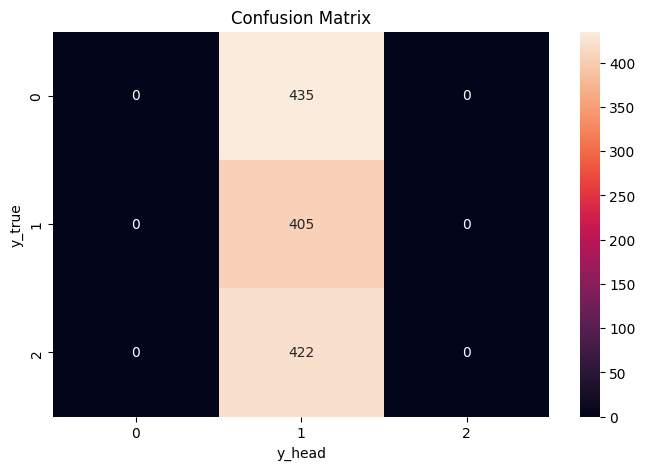

In [51]:
# Confusion Matrix of CNN_Model
from sklearn.metrics import confusion_matrix

y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

confusion_matrix(y_true, y_pred_classes)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred_classes), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.title("Confusion Matrix")
plt.show()

#### note to self 

model is underfit 
 - predicts only class 1 for all instances 
 - no correct predictions for class 0 and 2 
 - predicts only middle class(since its majority)

 fix epoch breakage 

 - increase epochs
 - ResNet, DenseNet Architectures 
 - check if classes are imbalanced
 


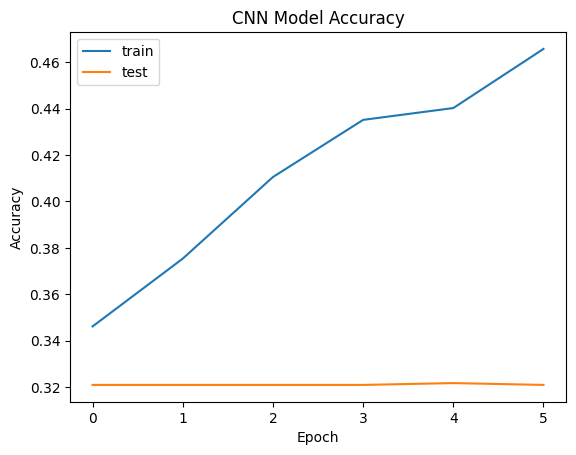

In [52]:
# Plot Model Accuracy

plt.plot(history_cnn.history['accuracy'])   
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

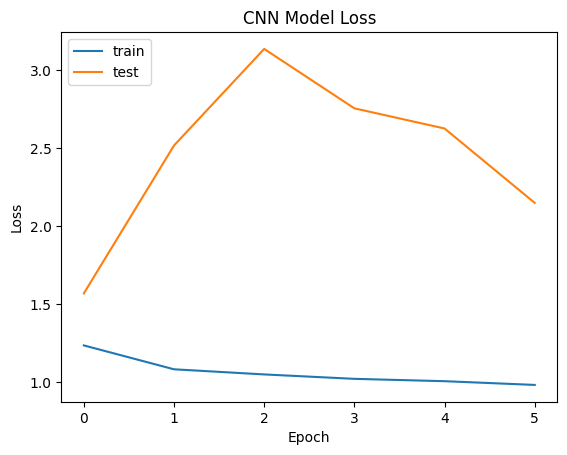

In [53]:
# Plot Model Loss
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()